# 2. Exploratory Data Analysis - Credit Card Data

This notebook performs an EDA on the credit card transaction dataset. This dataset is already highly processed (PCA features) and extremely imbalanced.

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.loading import load_creditcard_data
from src.data.cleaning import handle_missing_values, validate_data
from src.visualization.eda import (
    plot_univariate,
    plot_class_distribution,
    plot_correlation_matrix
)

## Load Data

In [2]:
cc_df = load_creditcard_data()
print(f"Credit Card Data Shape: {cc_df.shape}")
cc_df.head()

2025-12-27 19:05:29 - fraud_detection - INFO - Loading credit card data from C:\Users\Lenovo\Documents\dawir\Fraud-Detection\data\raw\creditcard.csv
2025-12-27 19:05:33 - fraud_detection - INFO - Loaded 284807 records with 31 columns
2025-12-27 19:05:33 - fraud_detection - INFO - Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Credit Card Data Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning and Validation

In [3]:
if validate_data(cc_df):
    print("Data validation passed.")
else:
    print("Data validation failed!")

# This dataset is usually clean, but let's be sure
cc_df = handle_missing_values(cc_df)

2025-12-27 19:05:34 - fraud_detection - INFO - All data validation checks passed
Data validation passed.


## Class Distribution

The imbalance in this dataset is typically extreme.

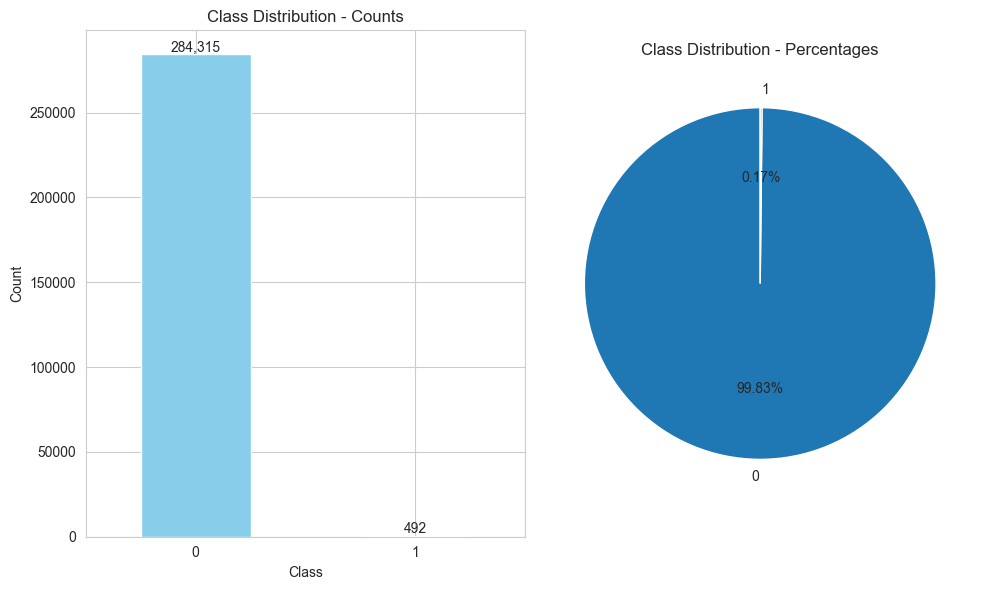

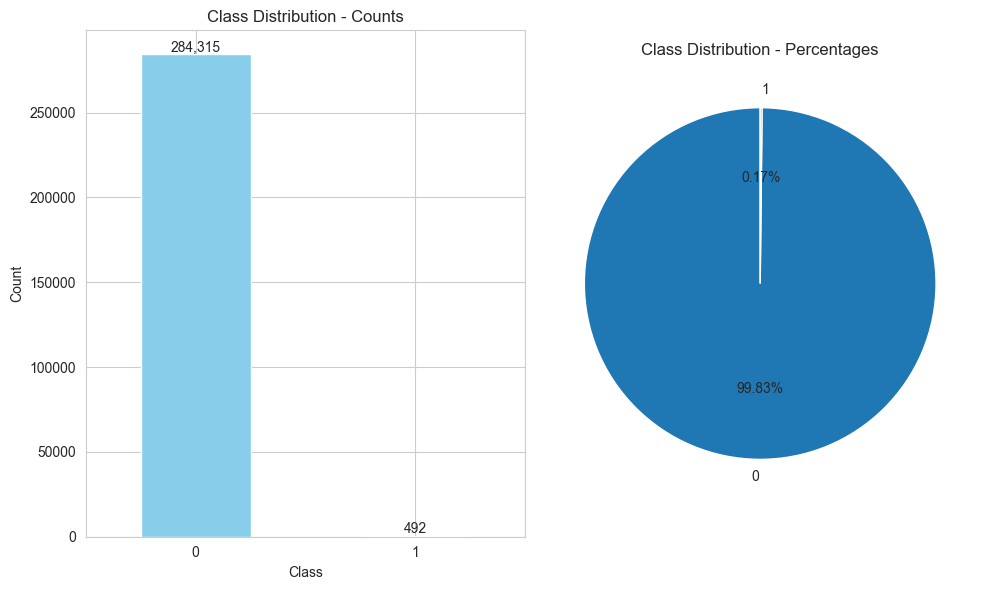

In [4]:
plot_class_distribution(cc_df, col='Class')

## Univariate Analysis

Analyzing Time and Amount distributions.

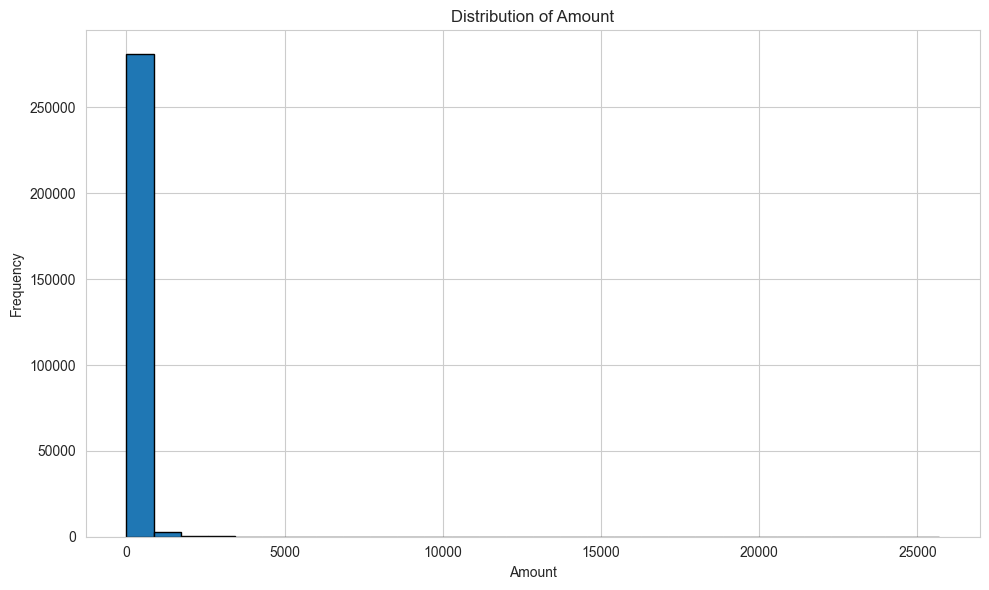

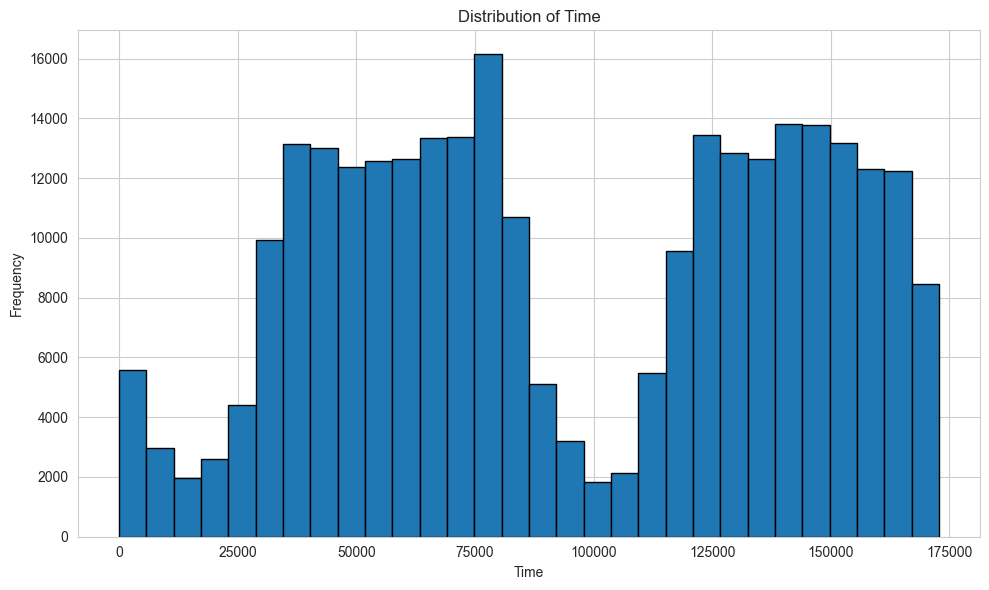

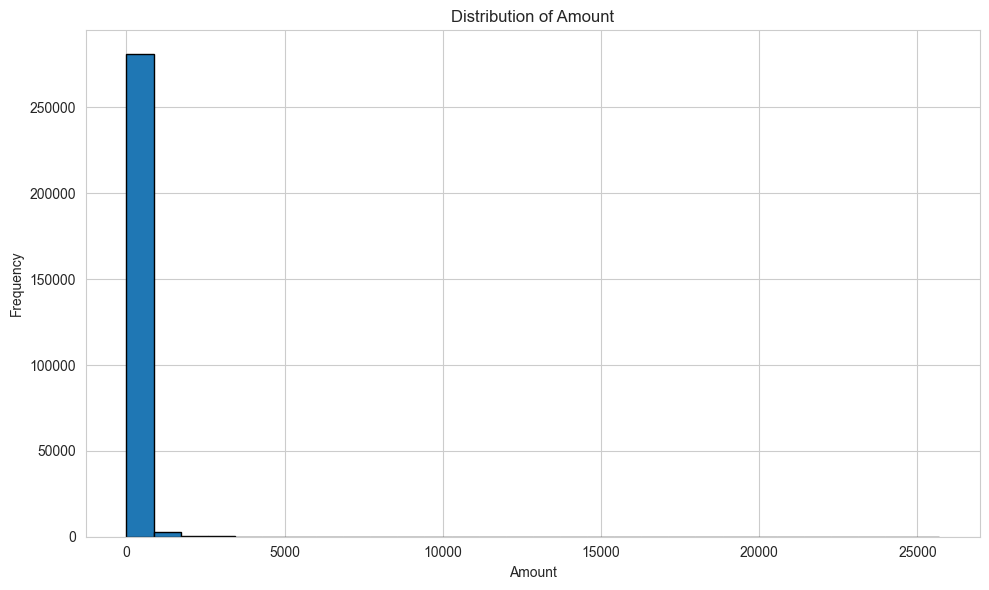

In [5]:
plot_univariate(cc_df, col='Time', kind='hist')
plot_univariate(cc_df, col='Amount', kind='hist')

## Correlation Analysis

Exploring correlations between PCA components and the target.

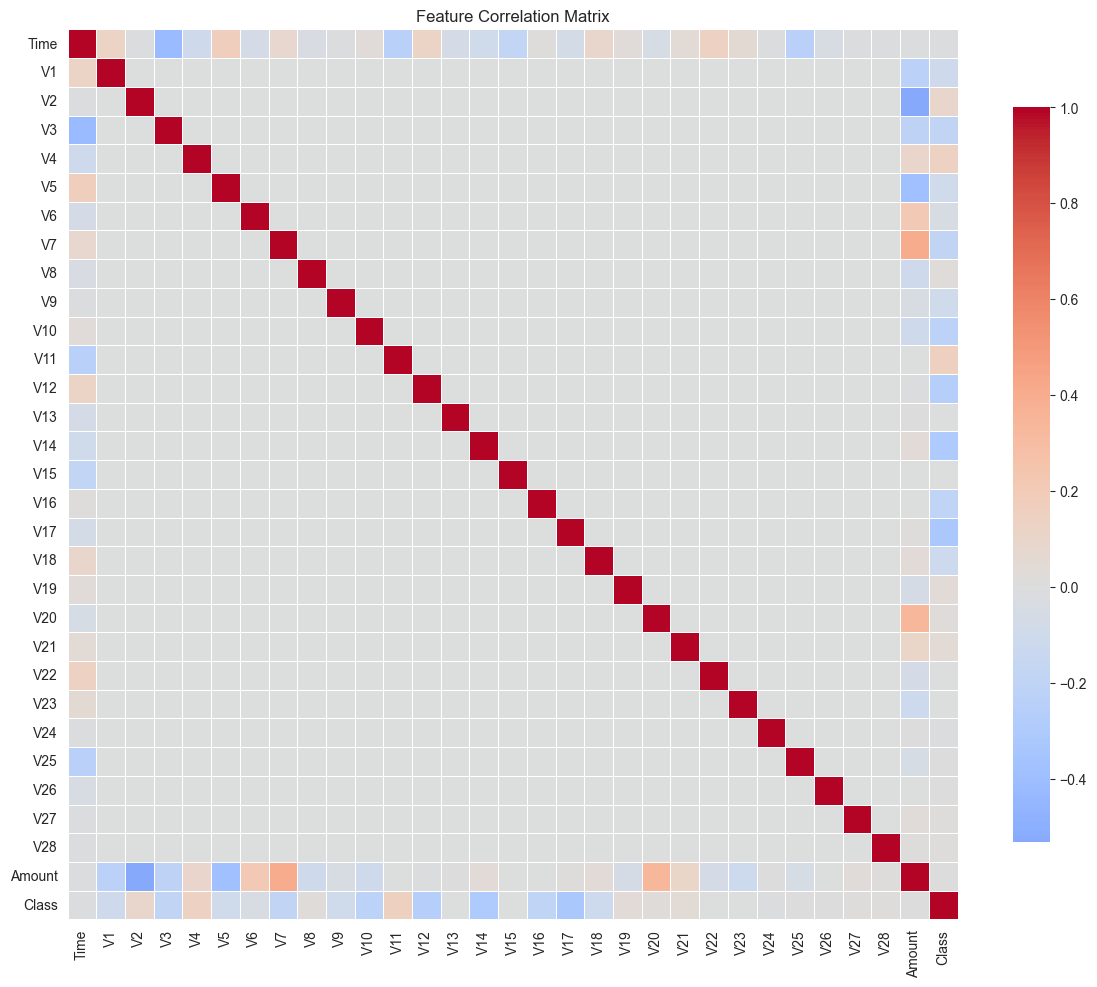

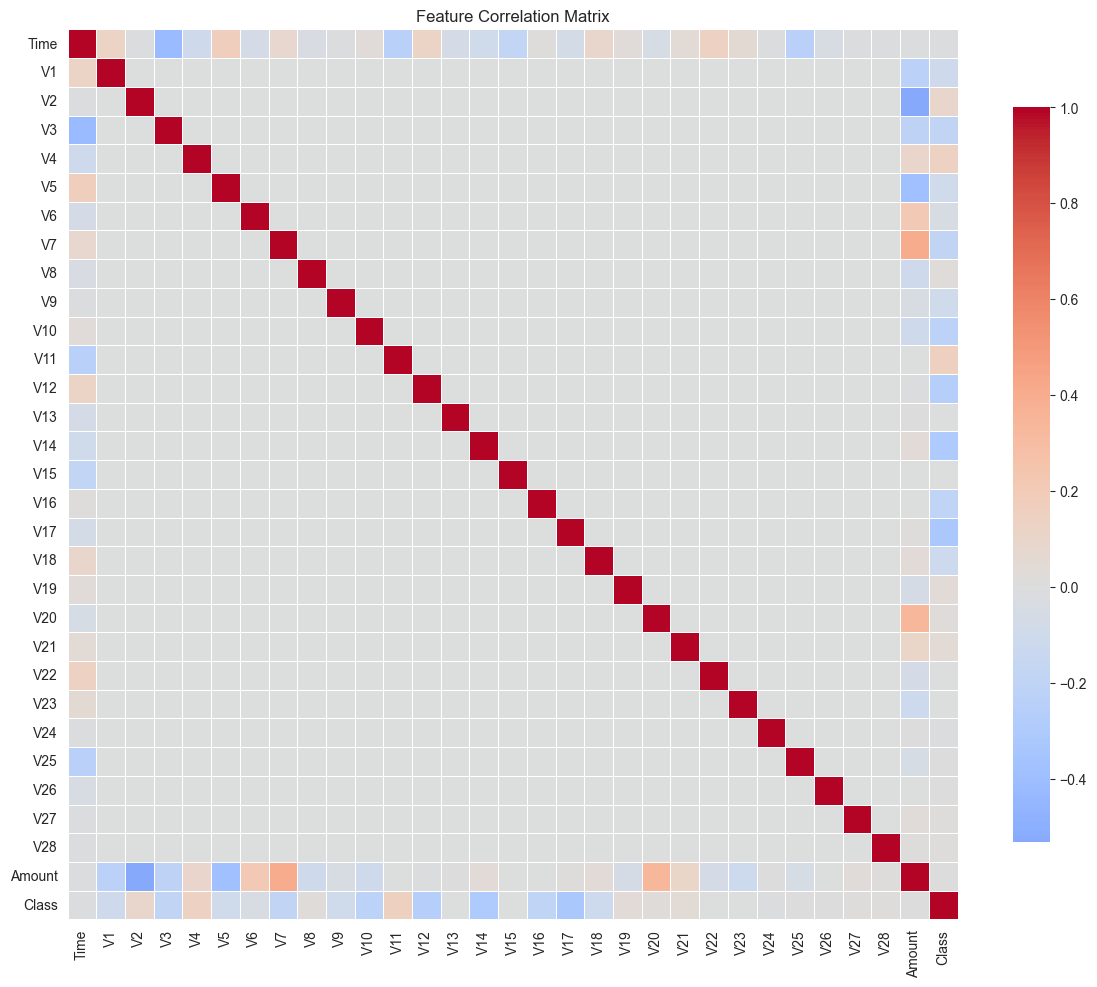

In [6]:
plot_correlation_matrix(cc_df)

## Conclusion

- Highly imbalanced dataset.
- PCA components (V1-V28) are decorrelated by design.
- Standard scaling or robust scaling might be needed for the 'Amount' feature later.